In [2]:
import values_mod_param as physical
import cbind_mod_physic as mod_physic
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
#import matplotlib as mpl
#import os
import matplotlib.colors as colors

from cartopy import config
import cartopy.crs as ccrs

import cartopy.io.img_tiles as cimgt
import hvplot.xarray
import geoviews as gv
import holoviews as hv

from matplotlib import cm
import netCDF4 as nc

In [19]:
topoCTRL = xr.open_dataset("topo_glmask_GL2_CTRL.nc")
topoGT1 = xr.open_dataset("topo_GT1.nc")
topoGT2 = xr.open_dataset("topo_GT2.nc")
topoGT7 = xr.open_dataset("topo_GT7.nc")

prCTRL = xr.open_dataset('CTRL2003_2008_PR_TM.nc').load()
prGT1 = xr.open_dataset('GT12003_2008_PR_TM.nc').load()
prGT2 = xr.open_dataset('GT22003_2008_PR_TM.nc').load()
prGT7 = xr.open_dataset('GT72003_2008_PR_TM.nc').load()

GT1_pr = prGT1.pr[0,0,:,:]
GT2_pr = prGT2.pr[0,0,:,:]
GT7_pr = prGT7.pr[0,0,:,:]

# CTRL

In [21]:
CTRL_pr = np.squeeze(prCTRL.pr)
topoCTRL

<xarray.Dataset>
Dimensions:  (y: 602, x: 402, height: 1, time: 1)
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * height   (height) float64 0.0
  * time     (time) float64 -1e+06
Dimensions without coordinates: y, x
Data variables:
    var6     (time, height, y, x) float32 ...
    var232   (time, height, y, x) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.4.0.1
    Conventions:  CF-1.0
    history:      Tue Mar 12 15:55:44 2019: cdo merge topo_geog.nc glmask.nc ...
    CDO:          Climate Data Operators version 1.4.0.1 (http://www.mpimet.m...

# GT1

Different percentages where the following amount of precip with lower values:
50% 442.2411193847656 mm/year
75% 788.8905639648438
80% 882.6385009765626
90% 1160.6869140625
99.9% 4529.4823007812565 : So 0.01% of the precip is higher than 4529.4823007812565


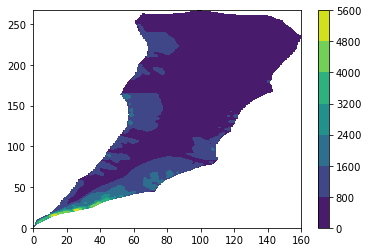

In [6]:
#Ice Mask

ice_mask = np.squeeze(topoGT1.ice_mask)

ice_ar = np.array(ice_mask)
ice_flat = ice_ar.flatten() 

#print(ice_flat.shape)

only_im = ice_mask.where(ice_mask>0,drop=True)
#print(only_im)

#plt.pcolormesh(only_im)

da = xr.DataArray(GT1_pr*365.25)
im_pr = da.where(ice_mask>0.,drop=True)

#print(gl_pr.shape)
plt.contourf(im_pr)
plt.colorbar()

fifty_per = np.nanpercentile(im_pr,50)
seventyfive_per = np.nanpercentile(im_pr,75)
eighty_per = np.nanpercentile(im_pr,80)
ninty_per = np.nanpercentile(im_pr,90)
nintynine_per = np.nanpercentile(im_pr,99.9)

print('Different percentages where the following amount of precip with lower values:')
print('50%',fifty_per,'mm/year')
print('75%',seventyfive_per)
print('80%',eighty_per)
print('90%',ninty_per)
print('99.9%',nintynine_per,': So 0.01% of the precip is higher than',nintynine_per)

Text(5, 155, '50%')

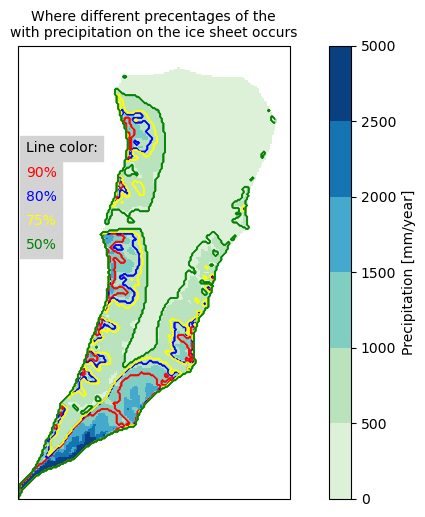

In [8]:
plt.figure(figsize=(10,6),dpi=100) 
ax = plt.axes(projection=ccrs.LambertConformal())

jet_big = cm.get_cmap('GnBu')
cmp = colors.ListedColormap(jet_big(np.linspace(0.15, 1, 250)))

#bounds = np.array([0,1000,2000,3000,4000,5000,20000,22000])
bounds = np.array([0,1000,3000,4000,9000,10000])

norm = colors.BoundaryNorm(bounds,cmp.N)

bounds = np.array([0,500,1000,1500,2000,2500,5000])
norm = colors.BoundaryNorm(bounds,cmp.N)

data1 = np.zeros_like(im_pr)
data1[im_pr >= fifty_per] = 1

data2 = np.zeros_like(im_pr)
data2[im_pr >= seventyfive_per] = 1

data3 = np.zeros_like(im_pr)
data3[im_pr >= eighty_per] = 1

data4 = np.zeros_like(im_pr)
data4[im_pr >= ninty_per] = 1


data = ax.pcolormesh(im_pr,cmap=cmp,norm=norm)

cbar = plt.colorbar(data)
cbar.set_label('Precipitation [mm/year]')

d4 = ax.contour(data4,colors='r',linewidths=0.4)
d3 = ax.contour(data3,colors='blue',linewidths=0.4)
d2 = ax.contour(data2,colors='yellow',linewidths=0.4)
d1 = ax.contour(data1,colors='green',linewidths=0.4)

ax.set_title('Where different precentages of the\nwith precipitation on the ice sheet occurs',fontsize=10)

ax.text(5,215,'Line color:',color='black',backgroundcolor='lightgray')
ax.text(5,200,'90%',color='r',backgroundcolor='lightgray')
ax.text(5,185,'80%',color='b',backgroundcolor='lightgray')
ax.text(5,170,'75%',color='yellow',backgroundcolor='lightgray')
ax.text(5,155,'50%',color='g',backgroundcolor='lightgray')

# GT2

Different percentages where the following amount of precip with lower values:
50% 316.7669677734375 mm/year
75% 616.1466064453125
80% 773.0763061523438
90% 1265.4909179687504
99.9% 4617.04849414066 : So 0.01% of the precip is higher than 4617.04849414066


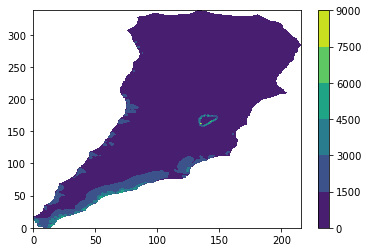

In [13]:
#Ice Mask for GT2

ice_mask = np.squeeze(topoGT2.ice_mask)

da = xr.DataArray(GT2_pr*365.25)
im_pr2 = da.where(ice_mask>0.,drop=True)

plt.contourf(im_pr2)
plt.colorbar()

fifty_per = np.nanpercentile(im_pr2,50)
seventyfive_per = np.nanpercentile(im_pr2,75)
eighty_per = np.nanpercentile(im_pr2,80)
ninty_per = np.nanpercentile(im_pr2,90)
nintynine_per = np.nanpercentile(im_pr2,99.9)

print('Different percentages where the following amount of precip with lower values:')
print('50%',fifty_per,'mm/year')
print('75%',seventyfive_per)
print('80%',eighty_per)
print('90%',ninty_per)
print('99.9%',nintynine_per,': So 0.01% of the precip is higher than',nintynine_per)

Text(5, 155, '50%')

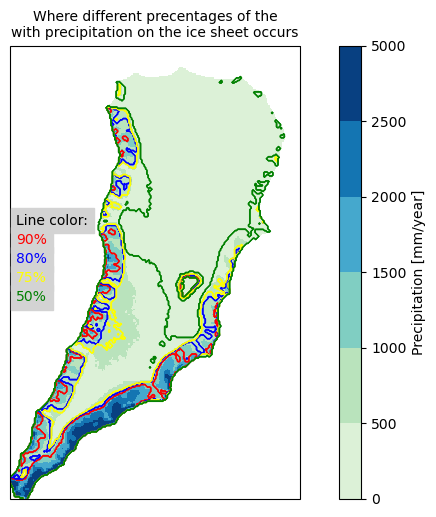

In [15]:
plt.figure(figsize=(10,6),dpi=100) 
ax = plt.axes(projection=ccrs.LambertConformal())

jet_big = cm.get_cmap('GnBu')
cmp = colors.ListedColormap(jet_big(np.linspace(0.15, 1, 250)))

bounds = np.array([0,500,1000,1500,2000,2500,5000])
norm = colors.BoundaryNorm(bounds,cmp.N)

data1 = np.zeros_like(im_pr2)
data1[im_pr2 >= fifty_per] = 1

data2 = np.zeros_like(im_pr2)
data2[im_pr2 >= seventyfive_per] = 1

data3 = np.zeros_like(im_pr2)
data3[im_pr2 >= eighty_per] = 1

data4 = np.zeros_like(im_pr2)
data4[im_pr2 >= ninty_per] = 1


data = ax.pcolormesh(im_pr2,cmap=cmp,norm=norm)

cbar = plt.colorbar(data)
cbar.set_label('Precipitation [mm/year]')

d4 = ax.contour(data4,colors='r',linewidths=0.4)
d3 = ax.contour(data3,colors='blue',linewidths=0.4)
d2 = ax.contour(data2,colors='yellow',linewidths=0.4)
d1 = ax.contour(data1,colors='green',linewidths=0.4)

ax.set_title('Where different precentages of the\nwith precipitation on the ice sheet occurs',fontsize=10)

ax.text(5,215,'Line color:',color='black',backgroundcolor='lightgray')
ax.text(5,200,'90%',color='r',backgroundcolor='lightgray')
ax.text(5,185,'80%',color='b',backgroundcolor='lightgray')
ax.text(5,170,'75%',color='yellow',backgroundcolor='lightgray')
ax.text(5,155,'50%',color='g',backgroundcolor='lightgray')

# GT7

Different percentages where the following amount of precip with lower values:
50% 319.07066345214844 mm/year
75% 551.1076507568359
80% 624.0457641601566
90% 966.8741577148437
99.9% 4750.8119526367245 : So 0.01% of the precip is higher than 4750.8119526367245


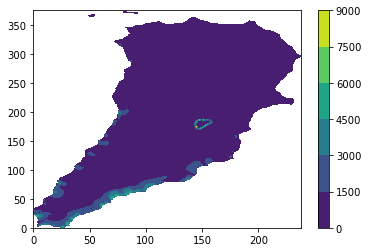

In [17]:
#Ice Mask for GT7

ice_mask = np.squeeze(topoGT7.ice_mask)

da = xr.DataArray(GT7_pr*365.25)
im_pr7 = da.where(ice_mask>0.,drop=True)

plt.contourf(im_pr7)
plt.colorbar()

fifty_per = np.nanpercentile(im_pr7,50)
seventyfive_per = np.nanpercentile(im_pr7,75)
eighty_per = np.nanpercentile(im_pr7,80)
ninty_per = np.nanpercentile(im_pr7,90)
nintynine_per = np.nanpercentile(im_pr7,99.9)

print('Different percentages where the following amount of precip with lower values:')
print('50%',fifty_per,'mm/year')
print('75%',seventyfive_per)
print('80%',eighty_per)
print('90%',ninty_per)
print('99.9%',nintynine_per,': So 0.01% of the precip is higher than',nintynine_per)

Text(5, 155, '50%')

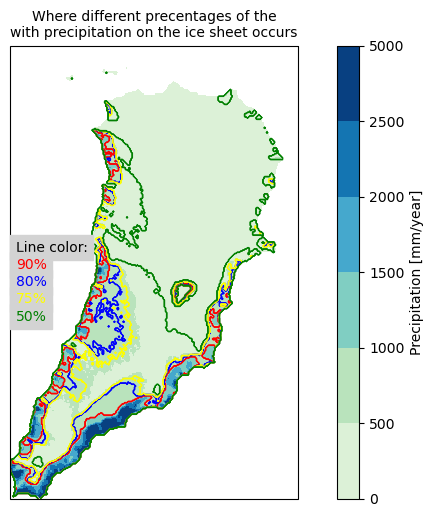

In [18]:
plt.figure(figsize=(10,6),dpi=100) 
ax = plt.axes(projection=ccrs.LambertConformal())

jet_big = cm.get_cmap('GnBu')
cmp = colors.ListedColormap(jet_big(np.linspace(0.15, 1, 250)))

bounds = np.array([0,500,1000,1500,2000,2500,5000])
norm = colors.BoundaryNorm(bounds,cmp.N)

data1 = np.zeros_like(im_pr7)
data1[im_pr7 >= fifty_per] = 1

data2 = np.zeros_like(im_pr7)
data2[im_pr7 >= seventyfive_per] = 1

data3 = np.zeros_like(im_pr7)
data3[im_pr7 >= eighty_per] = 1

data4 = np.zeros_like(im_pr7)
data4[im_pr7 >= ninty_per] = 1


data = ax.pcolormesh(im_pr7,cmap=cmp,norm=norm)

cbar = plt.colorbar(data)
cbar.set_label('Precipitation [mm/year]')

d4 = ax.contour(data4,colors='r',linewidths=0.4)
d3 = ax.contour(data3,colors='blue',linewidths=0.4)
d2 = ax.contour(data2,colors='yellow',linewidths=0.4)
d1 = ax.contour(data1,colors='green',linewidths=0.4)

ax.set_title('Where different precentages of the\nwith precipitation on the ice sheet occurs',fontsize=10)

ax.text(5,215,'Line color:',color='black',backgroundcolor='lightgray')
ax.text(5,200,'90%',color='r',backgroundcolor='lightgray')
ax.text(5,185,'80%',color='b',backgroundcolor='lightgray')
ax.text(5,170,'75%',color='yellow',backgroundcolor='lightgray')
ax.text(5,155,'50%',color='g',backgroundcolor='lightgray')